In [6]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_excel('~\Downloads\Data_Train (1).xlsx')

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])

Rows: 10683
Columns: 11


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [12]:
data.describe(include='object').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


In [13]:
data['Date_of_Journey']= pd.to_datetime(data['Date_of_Journey'])

In [14]:
data['Weekday']=data['Date_of_Journey'].dt.weekday

In [15]:
data['Month'] = data['Date_of_Journey'].dt.month

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,3,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [17]:
del data['Date_of_Journey']

In [18]:
route = data['Route'].value_counts()

In [19]:
p95 = np.percentile(route,95)

In [20]:
p95

394.6499999999998

In [21]:
data['Route']=data['Route'].map(route.to_dict())

In [22]:
data['Route'] = np.where(data['Route']>p95,'Busy','Not Busy')

In [23]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday,Month
0,IndiGo,Banglore,New Delhi,Busy,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3
1,Air India,Kolkata,Banglore,Not Busy,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,Not Busy,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4,9
3,IndiGo,Kolkata,Banglore,Not Busy,18:05,23:30,5h 25m,1 stop,No info,6218,3,12
4,IndiGo,Banglore,New Delhi,Not Busy,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Busy,19:55,22:25,2h 30m,non-stop,No info,4107,2,9
10679,Air India,Kolkata,Banglore,Busy,20:45,23:20,2h 35m,non-stop,No info,4145,5,4
10680,Jet Airways,Banglore,Delhi,Busy,08:20,11:20,3h,non-stop,No info,7229,5,4
10681,Vistara,Banglore,New Delhi,Busy,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [24]:
# Lets apply some statistical test on route and price

<AxesSubplot:xlabel='Route', ylabel='Price'>

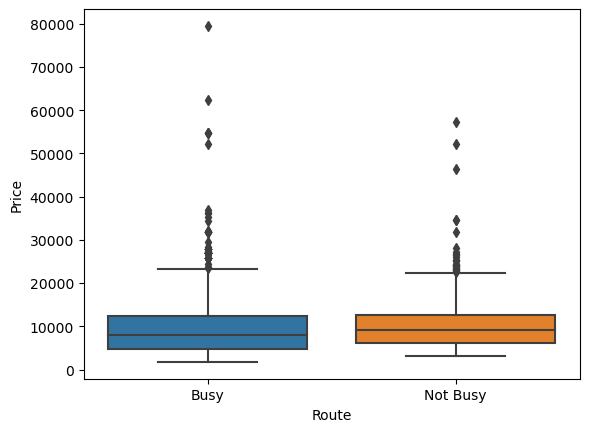

In [25]:
sns.boxplot(data['Route'],data['Price'])

In [26]:
samp_1 = data[data['Route']=='Busy']['Price']

In [27]:
samp_2 = data[data['Route']=='Not Busy']['Price']

In [28]:
from scipy.stats import shapiro,levene,mannwhitneyu

In [29]:
shapiro(samp_1),shapiro(samp_2)

(ShapiroResult(statistic=0.8829423189163208, pvalue=0.0),
 ShapiroResult(statistic=0.9102485179901123, pvalue=3.3077650250387307e-41))

In [30]:
levene(samp_1,samp_2)

LeveneResult(statistic=14.110026708901747, pvalue=0.0001733387174250684)

In [31]:
mannwhitneyu(samp_1,samp_2)

MannwhitneyuResult(statistic=11172723.5, pvalue=4.76532395869001e-19)

In [32]:
# Ho: The sample 1 is same as sample 2. There is no effect of route on price
# Ha: There is differnce between sample 1 and sample2. There is effect of Route

In [33]:
# Since p-value is less than 0.05 hence we can keep this column

In [34]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday,Month
0,IndiGo,Banglore,New Delhi,Busy,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3
1,Air India,Kolkata,Banglore,Not Busy,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,Not Busy,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4,9
3,IndiGo,Kolkata,Banglore,Not Busy,18:05,23:30,5h 25m,1 stop,No info,6218,3,12
4,IndiGo,Banglore,New Delhi,Not Busy,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Busy,19:55,22:25,2h 30m,non-stop,No info,4107,2,9
10679,Air India,Kolkata,Banglore,Busy,20:45,23:20,2h 35m,non-stop,No info,4145,5,4
10680,Jet Airways,Banglore,Delhi,Busy,08:20,11:20,3h,non-stop,No info,7229,5,4
10681,Vistara,Banglore,New Delhi,Busy,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [35]:
data['Dep_Hour']=pd.to_datetime(data['Dep_Time']).dt.hour

In [36]:
data['Ariv_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour

In [37]:
data.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)

In [38]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Weekday,Month,Dep_Hour,Ariv_hour
0,IndiGo,Banglore,New Delhi,Busy,2h 50m,non-stop,No info,3897,6,3,22,1
1,Air India,Kolkata,Banglore,Not Busy,7h 25m,2 stops,No info,7662,5,1,5,13
2,Jet Airways,Delhi,Cochin,Not Busy,19h,2 stops,No info,13882,4,9,9,4
3,IndiGo,Kolkata,Banglore,Not Busy,5h 25m,1 stop,No info,6218,3,12,18,23
4,IndiGo,Banglore,New Delhi,Not Busy,4h 45m,1 stop,No info,13302,3,1,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Busy,2h 30m,non-stop,No info,4107,2,9,19,22
10679,Air India,Kolkata,Banglore,Busy,2h 35m,non-stop,No info,4145,5,4,20,23
10680,Jet Airways,Banglore,Delhi,Busy,3h,non-stop,No info,7229,5,4,8,11
10681,Vistara,Banglore,New Delhi,Busy,2h 40m,non-stop,No info,12648,3,1,11,14


In [39]:
data[['Duration_h','Duration_m']]=data['Duration'].str.split(expand=True)

In [40]:
data['Duration_m'].value_counts()

30m    1446
20m     997
50m     972
35m     939
55m     910
15m     903
45m     896
25m     803
40m     637
5m      623
10m     525
Name: Duration_m, dtype: int64

In [41]:
data[data['Duration_h']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Weekday,Month,Dep_Hour,Ariv_hour,Duration_h,Duration_m
6474,Air India,Mumbai,Hyderabad,Not Busy,5m,2 stops,No info,17327,0,6,16,16,5m,None


In [42]:
data.drop(index=[6474],inplace=True)

In [43]:
data['Duration_h'].value_counts()

2h     2402
1h      621
3h      501
7h      487
5h      481
9h      445
12h     428
8h      424
13h     407
11h     365
10h     355
6h      340
14h     337
15h     268
23h     265
26h     241
16h     234
4h      222
22h     218
24h     197
21h     196
25h     186
27h     179
20h     162
18h     141
19h     134
17h     129
28h      94
29h      65
30h      49
38h      34
37h      17
33h      13
32h       9
34h       8
36h       7
35h       7
31h       6
47h       2
42h       2
39h       2
41h       1
40h       1
Name: Duration_h, dtype: int64

In [44]:
data['Duration_h']=data['Duration_h'].str.replace('h','')

In [45]:
data['Duration_m']=data['Duration_m'].str.replace('m','')

In [46]:
data['Duration_h']=data['Duration_h'].astype('float')
data['Duration_m']=data['Duration_m'].astype('float')

In [47]:
del data['Duration']

In [48]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Weekday,Month,Dep_Hour,Ariv_hour,Duration_h,Duration_m
0,IndiGo,Banglore,New Delhi,Busy,non-stop,No info,3897,6,3,22,1,2.0,50.0
1,Air India,Kolkata,Banglore,Not Busy,2 stops,No info,7662,5,1,5,13,7.0,25.0
2,Jet Airways,Delhi,Cochin,Not Busy,2 stops,No info,13882,4,9,9,4,19.0,NaN
3,IndiGo,Kolkata,Banglore,Not Busy,1 stop,No info,6218,3,12,18,23,5.0,25.0
4,IndiGo,Banglore,New Delhi,Not Busy,1 stop,No info,13302,3,1,16,21,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Busy,non-stop,No info,4107,2,9,19,22,2.0,30.0
10679,Air India,Kolkata,Banglore,Busy,non-stop,No info,4145,5,4,20,23,2.0,35.0
10680,Jet Airways,Banglore,Delhi,Busy,non-stop,No info,7229,5,4,8,11,3.0,NaN
10681,Vistara,Banglore,New Delhi,Busy,non-stop,No info,12648,3,1,11,14,2.0,40.0


In [49]:
data['Duration_m'].fillna(0,inplace=True)

In [50]:
data['Duration_m'] = (data['Duration_h']*60)+data['Duration_m']

In [51]:
del data['Duration_h']

In [52]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Weekday,Month,Dep_Hour,Ariv_hour,Duration_m
0,IndiGo,Banglore,New Delhi,Busy,non-stop,No info,3897,6,3,22,1,170.0
1,Air India,Kolkata,Banglore,Not Busy,2 stops,No info,7662,5,1,5,13,445.0
2,Jet Airways,Delhi,Cochin,Not Busy,2 stops,No info,13882,4,9,9,4,1140.0
3,IndiGo,Kolkata,Banglore,Not Busy,1 stop,No info,6218,3,12,18,23,325.0
4,IndiGo,Banglore,New Delhi,Not Busy,1 stop,No info,13302,3,1,16,21,285.0


In [53]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [54]:
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Weekday,Month,Dep_Hour,Ariv_hour,Duration_m
9039,Air India,Delhi,Cochin,Not Busy,NaN,No info,7480,2,6,9,9,1420.0


In [55]:
data.drop(index=[9039],inplace=True)

In [56]:
stop_map = {'non-stop':0,'2 stops':2,'1 stop':1,
           '3 stops':3,'4 stops':4}
data['Total_Stops']= data['Total_Stops'].map(stop_map)

In [57]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Weekday,Month,Dep_Hour,Ariv_hour,Duration_m
0,IndiGo,Banglore,New Delhi,Busy,0,No info,3897,6,3,22,1,170.0
1,Air India,Kolkata,Banglore,Not Busy,2,No info,7662,5,1,5,13,445.0
2,Jet Airways,Delhi,Cochin,Not Busy,2,No info,13882,4,9,9,4,1140.0
3,IndiGo,Kolkata,Banglore,Not Busy,1,No info,6218,3,12,18,23,325.0
4,IndiGo,Banglore,New Delhi,Not Busy,1,No info,13302,3,1,16,21,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Busy,0,No info,4107,2,9,19,22,150.0
10679,Air India,Kolkata,Banglore,Busy,0,No info,4145,5,4,20,23,155.0
10680,Jet Airways,Banglore,Delhi,Busy,0,No info,7229,5,4,8,11,180.0
10681,Vistara,Banglore,New Delhi,Busy,0,No info,12648,3,1,11,14,160.0


In [58]:
data['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [59]:
data['Additional_Info']= np.where((data['Additional_Info']=='No info')|(data['Additional_Info']=='No Info'),
                                  0,1)

In [60]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Weekday,Month,Dep_Hour,Ariv_hour,Duration_m
0,IndiGo,Banglore,New Delhi,Busy,0,0,3897,6,3,22,1,170.0
1,Air India,Kolkata,Banglore,Not Busy,2,0,7662,5,1,5,13,445.0
2,Jet Airways,Delhi,Cochin,Not Busy,2,0,13882,4,9,9,4,1140.0
3,IndiGo,Kolkata,Banglore,Not Busy,1,0,6218,3,12,18,23,325.0
4,IndiGo,Banglore,New Delhi,Not Busy,1,0,13302,3,1,16,21,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Busy,0,0,4107,2,9,19,22,150.0
10679,Air India,Kolkata,Banglore,Busy,0,0,4145,5,4,20,23,155.0
10680,Jet Airways,Banglore,Delhi,Busy,0,0,7229,5,4,8,11,180.0
10681,Vistara,Banglore,New Delhi,Busy,0,0,12648,3,1,11,14,160.0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  object 
 1   Source           10681 non-null  object 
 2   Destination      10681 non-null  object 
 3   Route            10681 non-null  object 
 4   Total_Stops      10681 non-null  int64  
 5   Additional_Info  10681 non-null  int32  
 6   Price            10681 non-null  int64  
 7   Weekday          10681 non-null  int64  
 8   Month            10681 non-null  int64  
 9   Dep_Hour         10681 non-null  int64  
 10  Ariv_hour        10681 non-null  int64  
 11  Duration_m       10681 non-null  float64
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 1.0+ MB


## Perform some statistical Analysis

In [62]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Weekday,Month,Dep_Hour,Ariv_hour,Duration_m
0,IndiGo,Banglore,New Delhi,Busy,0,0,3897,6,3,22,1,170.0
1,Air India,Kolkata,Banglore,Not Busy,2,0,7662,5,1,5,13,445.0
2,Jet Airways,Delhi,Cochin,Not Busy,2,0,13882,4,9,9,4,1140.0
3,IndiGo,Kolkata,Banglore,Not Busy,1,0,6218,3,12,18,23,325.0
4,IndiGo,Banglore,New Delhi,Not Busy,1,0,13302,3,1,16,21,285.0


In [63]:
# 1. Is there any relation between price and the duration
# 2. Is there any effect of stops on price
# 3. Any effect of airline on price
# 4. Any effect of source and destination on Price
# 5. Any effect of destination on route.

In [64]:
from scipy.stats import jarque_bera

In [65]:
# Ans 1
jarque_bera(data['Price']),jarque_bera(data['Duration_m'])
# The data for price and duration is not normal

(Jarque_beraResult(statistic=84616.73120379921, pvalue=0.0),
 Jarque_beraResult(statistic=1332.9088017704958, pvalue=0.0))

In [66]:
levene(data['Price'],data['Duration_m'])
# the data does not have equal variances

LeveneResult(statistic=12514.28647827373, pvalue=0.0)

In [67]:
# Lest go with the non parametric test (Mann whitny U test)

In [68]:
# Ho: mu1 = mu2 (There is no relation)
# Ha: mu1 != mu2 (There is relation)
mannwhitneyu(data['Price'],data['Duration_m'])

MannwhitneyuResult(statistic=114071731.5, pvalue=0.0)

In [69]:
# We have to reject the Ho:
# So there is an effect of duration on price

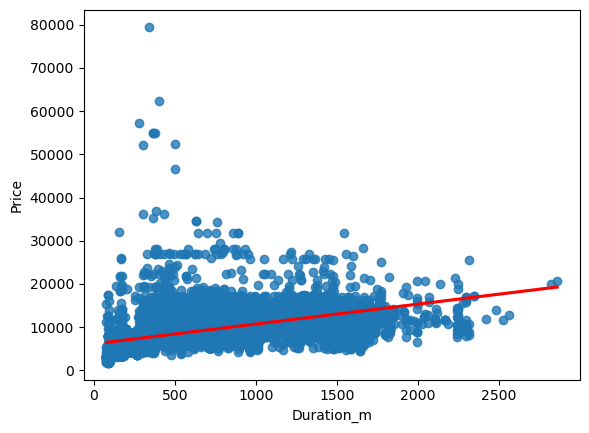

In [70]:
sns.regplot(data['Duration_m'],data['Price'],ci=0,line_kws={'color':'r'})
plt.show()

In [71]:
# Ans 2
from scipy.stats import kruskal,jarque_bera

In [72]:
sam_1 = data[data['Total_Stops']==0]['Price']
sam_2 = data[data['Total_Stops']==1]['Price']
sam_3 = data[data['Total_Stops']==2]['Price']
sam_4 = data[data['Total_Stops']==3]['Price']
sam_5 = data[data['Total_Stops']==4]['Price']

In [73]:
# ho: There is no effect of category on num column
# ha: There is an effect of category on num column
kruskal(sam_1,sam_2,sam_3,sam_4,sam_5)

KruskalResult(statistic=5749.841918443617, pvalue=0.0)

In [74]:
# sice p value is less than 0.05, we can say that there is an effect 
# of total stops on price 

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

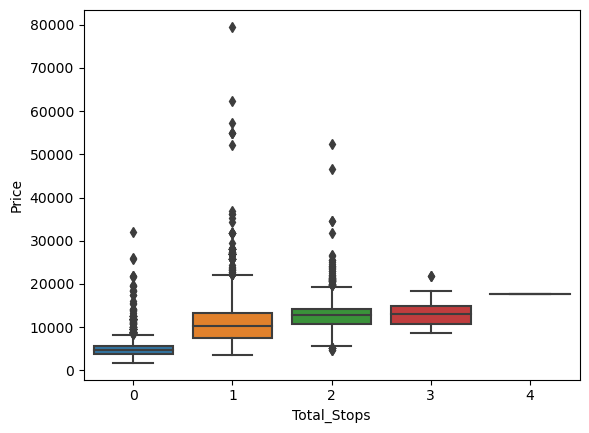

In [75]:
sns.boxplot(x=data['Total_Stops'],y=data['Price'])

In [76]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [77]:
# Ans 5
# Ho: both the columns are independent.
# Ha: both the columns are dependent.
import scipy.stats as stats

In [78]:
cont=pd.crosstab(data.Source,data.Route)

In [79]:
stats.chi2_contingency(cont)

(2049.8221547611133,
 0.0,
 4,
 array([[1484.89308117,  712.10691883],
        [ 257.50763037,  123.49236963],
        [3065.76013482, 1470.23986518],
        [1940.4315139 ,  930.5684861 ],
        [ 470.40763973,  225.59236027]]))

In [80]:
# Inf: we will reject Ho. hence, there is an effect of source on route.

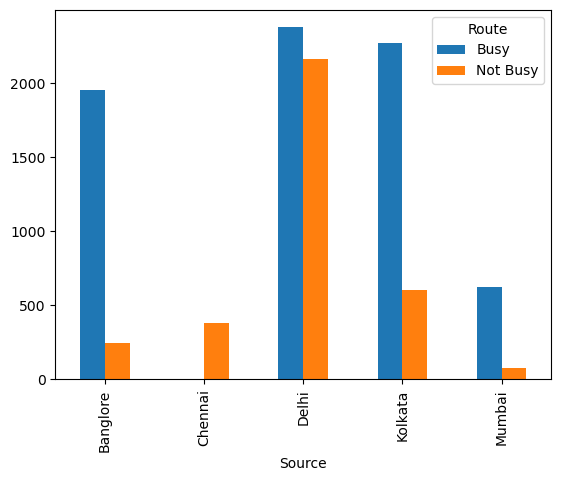

In [81]:
cont.plot(kind='bar')
plt.show()

## Outlier treatment, encoding, transformation

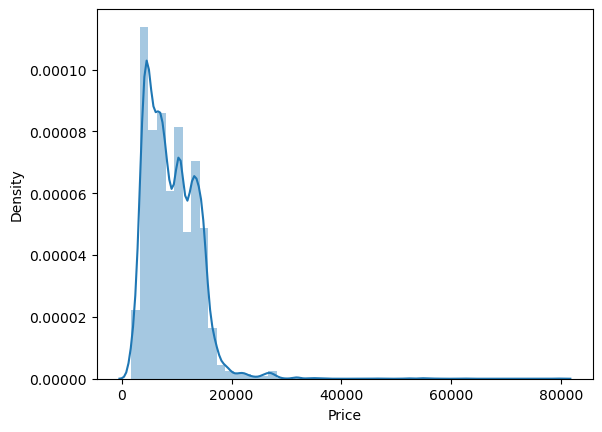

In [82]:
sns.distplot(data['Price'])
plt.show()

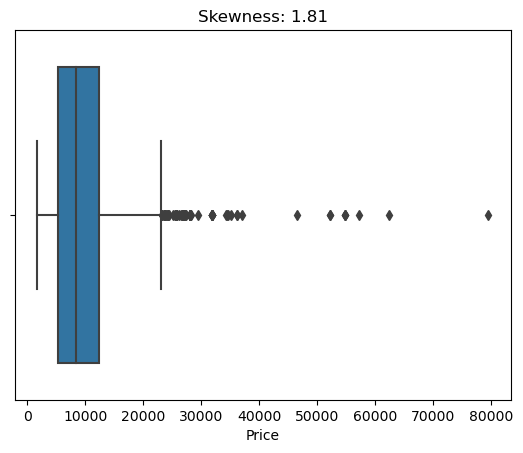

In [83]:
sns.boxplot(data['Price'])
plt.title('Skewness: %.2f'%data['Price'].skew())
plt.show()

In [84]:
# Target encoding

In [85]:
airline_dict = round(data.groupby(['Airline'])['Price'].mean(),0).to_dict()

In [86]:
sum(airline_dict.values())

144294.0

In [87]:
airline_dict

{'Air Asia': 5590.0,
 'Air India': 9608.0,
 'GoAir': 5861.0,
 'IndiGo': 5674.0,
 'Jet Airways': 11644.0,
 'Jet Airways Business': 58359.0,
 'Multiple carriers': 10903.0,
 'Multiple carriers Premium economy': 11419.0,
 'SpiceJet': 4338.0,
 'Trujet': 4140.0,
 'Vistara': 7796.0,
 'Vistara Premium economy': 8962.0}

In [88]:
data['Airline'] = (data['Airline'].map(airline_dict))/sum(airline_dict.values())

In [89]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Weekday,Month,Dep_Hour,Ariv_hour,Duration_m
0,0.039322,Banglore,New Delhi,Busy,0,0,3897,6,3,22,1,170.0
1,0.066586,Kolkata,Banglore,Not Busy,2,0,7662,5,1,5,13,445.0
2,0.080696,Delhi,Cochin,Not Busy,2,0,13882,4,9,9,4,1140.0
3,0.039322,Kolkata,Banglore,Not Busy,1,0,6218,3,12,18,23,325.0
4,0.039322,Banglore,New Delhi,Not Busy,1,0,13302,3,1,16,21,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.038740,Kolkata,Banglore,Busy,0,0,4107,2,9,19,22,150.0
10679,0.066586,Kolkata,Banglore,Busy,0,0,4145,5,4,20,23,155.0
10680,0.080696,Banglore,Delhi,Busy,0,0,7229,5,4,8,11,180.0
10681,0.054029,Banglore,New Delhi,Busy,0,0,12648,3,1,11,14,160.0


In [90]:
source_dict = data['Source'].value_counts(normalize=True).to_dict()

In [91]:
destination_dict = data['Destination'].value_counts(normalize=True).to_dict()

In [92]:
data['Source'] = data['Source'].map(source_dict)
data['Destination'] = data['Destination'].map(destination_dict)

In [93]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Weekday,Month,Dep_Hour,Ariv_hour,Duration_m
0,0.039322,0.205692,0.087258,Busy,0,0,3897,6,3,22,1,170.0
1,0.066586,0.268795,0.268795,Not Busy,2,0,7662,5,1,5,13,445.0
2,0.080696,0.424679,0.424679,Not Busy,2,0,13882,4,9,9,4,1140.0
3,0.039322,0.268795,0.268795,Not Busy,1,0,6218,3,12,18,23,325.0
4,0.039322,0.205692,0.087258,Not Busy,1,0,13302,3,1,16,21,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.038740,0.268795,0.268795,Busy,0,0,4107,2,9,19,22,150.0
10679,0.066586,0.268795,0.268795,Busy,0,0,4145,5,4,20,23,155.0
10680,0.080696,0.205692,0.118435,Busy,0,0,7229,5,4,8,11,180.0
10681,0.054029,0.205692,0.087258,Busy,0,0,12648,3,1,11,14,160.0


In [94]:
data['Route'] = np.where(data['Route']=='Busy',1,0)

In [95]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Weekday,Month,Dep_Hour,Ariv_hour,Duration_m
0,0.039322,0.205692,0.087258,1,0,0,3897,6,3,22,1,170.0
1,0.066586,0.268795,0.268795,0,2,0,7662,5,1,5,13,445.0
2,0.080696,0.424679,0.424679,0,2,0,13882,4,9,9,4,1140.0
3,0.039322,0.268795,0.268795,0,1,0,6218,3,12,18,23,325.0
4,0.039322,0.205692,0.087258,0,1,0,13302,3,1,16,21,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.038740,0.268795,0.268795,1,0,0,4107,2,9,19,22,150.0
10679,0.066586,0.268795,0.268795,1,0,0,4145,5,4,20,23,155.0
10680,0.080696,0.205692,0.118435,1,0,0,7229,5,4,8,11,180.0
10681,0.054029,0.205692,0.087258,1,0,0,12648,3,1,11,14,160.0


### TRAIN TEST SPLIT

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
y = data['Price']
x = data.drop(columns=['Price'])

In [98]:
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.8,random_state=2)

In [99]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(8544, 11) (8544,) (2137, 11) (2137,)


In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
sc = StandardScaler()

In [102]:
train_x['Duration_m'] = sc.fit_transform(pd.DataFrame(train_x['Duration_m']))

In [103]:
test_x['Duration_m'] = sc.transform(pd.DataFrame(test_x['Duration_m']))

In [104]:
train_x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Weekday,Month,Dep_Hour,Ariv_hour,Duration_m
9958,0.075561,0.424679,0.424679,1,1,0,6,1,11,19,-0.334691
7083,0.080696,0.065162,0.065162,1,0,1,2,5,10,11,-1.087591
713,0.080696,0.268795,0.268795,1,1,1,6,3,19,16,1.181015
885,0.066586,0.205692,0.118435,1,0,0,2,5,13,16,-0.929086
8387,0.039322,0.205692,0.118435,1,0,0,4,1,4,6,-0.929086
...,...,...,...,...,...,...,...,...,...,...,...
1099,0.066586,0.268795,0.268795,0,2,0,2,6,16,8,0.655966
2514,0.080696,0.268795,0.268795,1,1,1,3,9,16,10,0.824378
6638,0.080696,0.268795,0.268795,1,1,0,3,6,9,18,-0.265345
2575,0.080696,0.424679,0.424679,1,1,1,3,9,11,4,0.745126


In [105]:
import statsmodels.api as sm

In [106]:
train_x_c = sm.add_constant(train_x)
test_x_c = sm.add_constant(test_x)

In [107]:
train_x_c

,const,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Weekday,Month,Dep_Hour,Ariv_hour,Duration_m
9958,1.0,0.075561,0.424679,0.424679,1,1,0,6,1,11,19,-0.334691
7083,1.0,0.080696,0.065162,0.065162,1,0,1,2,5,10,11,-1.087591
713,1.0,0.080696,0.268795,0.268795,1,1,1,6,3,19,16,1.181015
885,1.0,0.066586,0.205692,0.118435,1,0,0,2,5,13,16,-0.929086
8387,1.0,0.039322,0.205692,0.118435,1,0,0,4,1,4,6,-0.929086
...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1.0,0.066586,0.268795,0.268795,0,2,0,2,6,16,8,0.655966
2514,1.0,0.080696,0.268795,0.268795,1,1,1,3,9,16,10,0.824378
6638,1.0,0.080696,0.268795,0.268795,1,1,0,3,6,9,18,-0.265345
2575,1.0,0.080696,0.424679,0.424679,1,1,1,3,9,11,4,0.745126


In [108]:
base_model = sm.OLS(train_y,train_x_c).fit()

In [109]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1153.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:43:27   Log-Likelihood:                -80235.
No. Observations:                8544   AIC:                         1.605e+05
Df Residuals:                    8532   BIC:                         1.606e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -706.2175    192.516     -3.668      0.000   -1083.596    -328.840
Airline          1.067e+05   1964.171     54.312      0.000    1.03e+05    1.11e+05
Source           1.017e+04   1001.530     10.152      0.000    8203.795    1.21e+04
Destination     -9811.8998    852.241    -11.513      0.000   -1.15e+04   -8141.301
Route            1354.1962     86.395     15.674      0.000    1184.840    1523.552
Total_Stops      3319.7117     92.723     35.803      0.000    3137.953    3501.471
Additional_Info -2127.9201     80.992    -26.273      0.000   -2286.684   -1969.156
Weekday            -8.6787     17.397     -0.499      0.618     -42.781      25.424
Month             -46.7595     10.771     -4.341      0.000     -67.874     -25.645
Dep_Hour           18.1542      5.515      3.292      0.001       7.344      28.965
Ariv_hour         -28.0022      4.597     -6.092      0.000     -37.013     -18.991
Duration_m         50.2612     48.566      1.035      0.301     -44.939     145.462
==============================================================================
Omnibus:                     5006.751   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125816.351
Skew:                           2.338   Prob(JB):                         0.00
Kurtosis:                      21.209   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

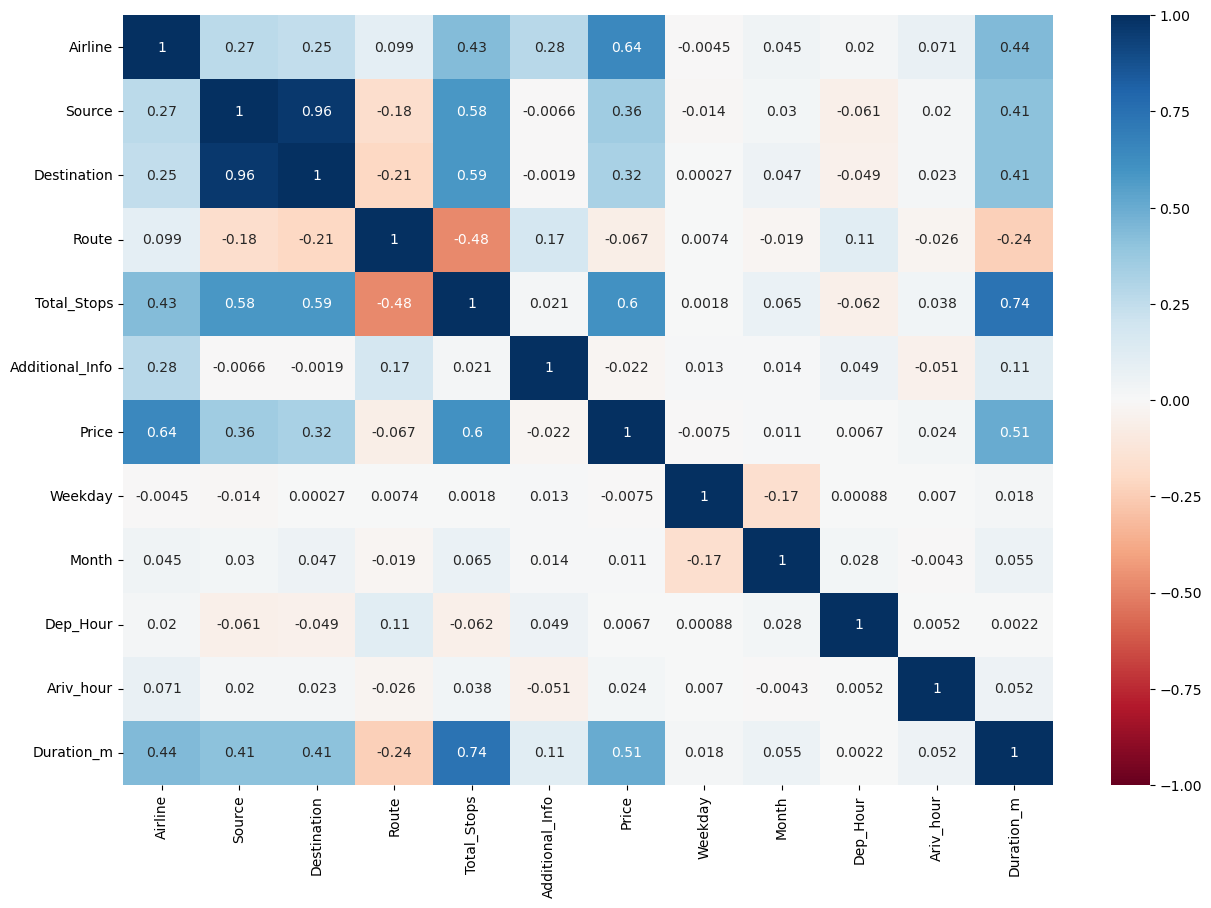

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu')

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
vif = [variance_inflation_factor(train_x,i) for i in range(train_x.shape[1])]

In [113]:
pd.DataFrame({'VIF':vif},index=train_x.columns).sort_values(by='VIF',ascending=False)

,VIF
Source,95.189447
Destination,68.544003
Airline,14.928061
Total_Stops,9.754141
Dep_Hour,5.088995
Route,4.960392
Ariv_hour,4.388322
Month,4.100819
Weekday,3.187235
Duration_m,2.085063


In [114]:
train_x.drop(columns=['Source'],inplace=True)

In [115]:
vif = [variance_inflation_factor(train_x,i) for i in range(train_x.shape[1])]
pd.DataFrame({'VIF':vif},index=train_x.columns).sort_values(by='VIF',ascending=False)
       

,VIF
Airline,14.235930
Total_Stops,9.507766
Destination,7.152144
Dep_Hour,5.066342
Route,4.758169
Ariv_hour,4.350525
Month,4.086744
Weekday,3.177417
Duration_m,2.016930
Additional_Info,1.443758


In [116]:
train_x.drop(columns=['Airline'],inplace=True)

In [117]:
vif = [variance_inflation_factor(train_x,i) for i in range(train_x.shape[1])]
pd.DataFrame({'VIF':vif},index=train_x.columns).sort_values(by='VIF',ascending=False)

,VIF
Total_Stops,7.602770
Destination,7.126562
Dep_Hour,4.916999
Ariv_hour,4.104218
Month,3.967670
Route,3.647772
Weekday,3.116363
Duration_m,2.013143
Additional_Info,1.357652


In [118]:
train_x_c.drop(columns=['Airline','Source'],inplace=True)
test_x.drop(columns=['Airline','Source'],inplace=True)
test_x_c.drop(columns=['Airline','Source'],inplace=True)

In [119]:
base_model = sm.OLS(train_y,train_x_c).fit()

In [120]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     774.3
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:43:29   Log-Likelihood:                -81575.
No. Observations:                8544   AIC:                         1.632e+05
Df Residuals:                    8534   BIC:                         1.632e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3968.7375    194.099     20.447      0.000    3588.256    4349.219
Destination     -2191.6848    319.841     -6.852      0.000   -2818.650   -1564.719
Route            3076.4802     94.214     32.654      0.000    2891.797    3261.163
Total_Stops      5029.0073    102.372     49.125      0.000    4828.334    5229.681
Additional_Info -1091.0367     91.777    -11.888      0.000   -1270.941    -911.132
Weekday           -35.2129     20.305     -1.734      0.083     -75.016       4.590
Month             -47.0492     12.575     -3.742      0.000     -71.698     -22.400
Dep_Hour           14.8716      6.438      2.310      0.021       2.252      27.492
Ariv_hour          -7.9911      5.358     -1.491      0.136     -18.494       2.512
Duration_m        360.6066     56.343      6.400      0.000     250.161     471.052
==============================================================================
Omnibus:                     7078.122   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           622386.057
Skew:                           3.441   Prob(JB):                         0.00
Kurtosis:                      44.242   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

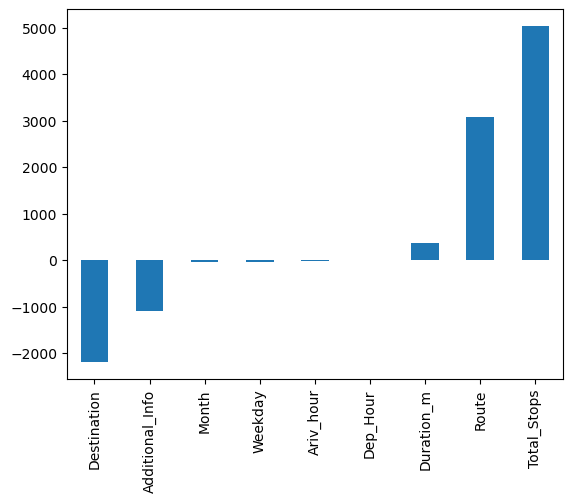

In [121]:
base_model.params[1:].sort_values().plot(kind='bar')

In [122]:
resid = base_model.resid

<AxesSubplot:ylabel='Density'>

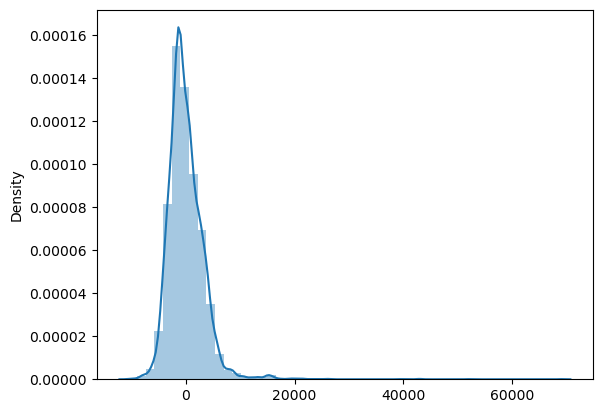

In [123]:
sns.distplot(resid)

In [124]:
from scipy.stats import jarque_bera

In [125]:
jarque_bera(resid) # data is more than 5000

Jarque_beraResult(statistic=622386.057352085, pvalue=0.0)

In [126]:
# We have to reject the Ho, hence the data is not normal

In [127]:
from statsmodels.graphics.gofplots import qqplot

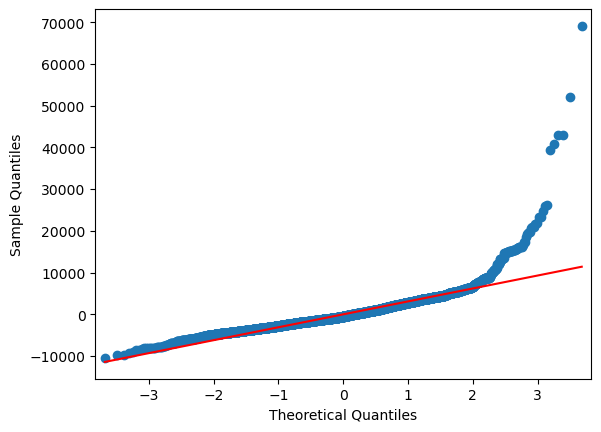

In [128]:
qqplot(resid,line='r')
plt.show()

In [129]:
y_pred_train = base_model.predict(train_x_c)

<AxesSubplot:xlabel='Price'>

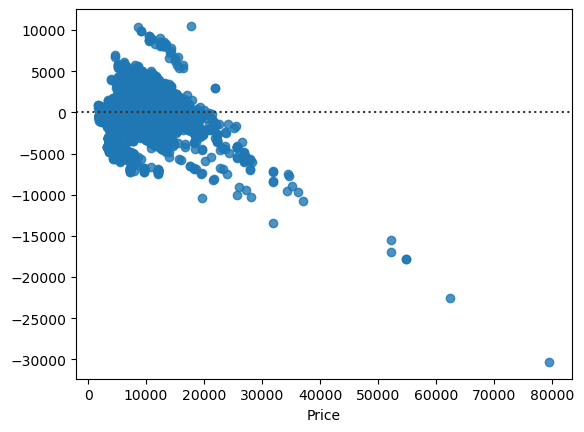

In [130]:
sns.residplot(train_y,y_pred_train)

In [131]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [132]:
_,_,_,p = het_breuschpagan(resid,train_x_c)

In [133]:
# Ho: There is homoscedasticity
# ha: There is hetroscedasticity

In [134]:
# Since p value is less than 0.05, there is hetroscedasticity

### Validation function

In [135]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [136]:
def validation(test,pred):
    r2 = r2_score(test,pred)
    print('R-Square: ',r2)
    n = test_x.shape[0]
    k = test_x.shape[1]
    adj_r2= 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted R2: ',adj_r2)
    print('MSE: ',mean_squared_error(test,pred))
    print('RMSE: ',mean_squared_error(test,pred)**0.5)
    print('MAPE: ',mean_absolute_percentage_error(test,pred))

### Model Function

In [137]:
def model(model,trainx,trainy,testx,testy):
    print('%s'%model)
    model.fit(trainx,trainy)
    ypred = model.predict(testx)
    validation(testy,ypred)
    print()

### Lets Try Linear Models

In [138]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor

In [139]:
model(LinearRegression(),train_x,train_y,test_x,test_y)

LinearRegression()
R-Square:  0.43453880745484963
Adjusted R2:  0.43214616489118884
MSE:  12868070.063974375
RMSE:  3587.209230582233
MAPE:  0.3091247986124526



In [140]:
model(Ridge(alpha=1),train_x,train_y,test_x,test_y)

Ridge(alpha=1)
R-Square:  0.43444896630442953
Adjusted R2:  0.4320559435948572
MSE:  12870114.558333093
RMSE:  3587.494189310011
MAPE:  0.3090880455038943



In [141]:
model(Lasso(alpha=0.1),train_x,train_y,test_x,test_y)

Lasso(alpha=0.1)
R-Square:  0.43451140683170797
Adjusted R2:  0.4321186483274697
MSE:  12868693.613641499
RMSE:  3587.2961424506757
MAPE:  0.3091133445473112



In [142]:
model(ElasticNet(alpha=0.1,l1_ratio=0.5),train_x,train_y,test_x,test_y)

ElasticNet(alpha=0.1)
R-Square:  0.4080539510533209
Adjusted R2:  0.40554924280672
MSE:  13470779.83840679
RMSE:  3670.256099839191
MAPE:  0.3107329044807618



In [143]:
model(SGDRegressor(),train_x,train_y,test_x,test_y)

SGDRegressor()
R-Square:  0.37930100291006574
Adjusted R2:  0.37667463197738615
MSE:  14125104.053987129
RMSE:  3758.3379377042625
MAPE:  0.3779525434573139



### Let us try some tree based models

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
model(DecisionTreeRegressor(max_depth=4),train_x,train_y,test_x,test_y)

DecisionTreeRegressor(max_depth=4)
R-Square:  0.623297429180913
Adjusted R2:  0.621703483183089
MSE:  8572533.603519091
RMSE:  2927.8889329206277
MAPE:  0.23637138788984804



In [146]:
dt = DecisionTreeRegressor(max_depth=4)

In [147]:
from sklearn.tree import plot_tree

In [148]:
dt.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=4)

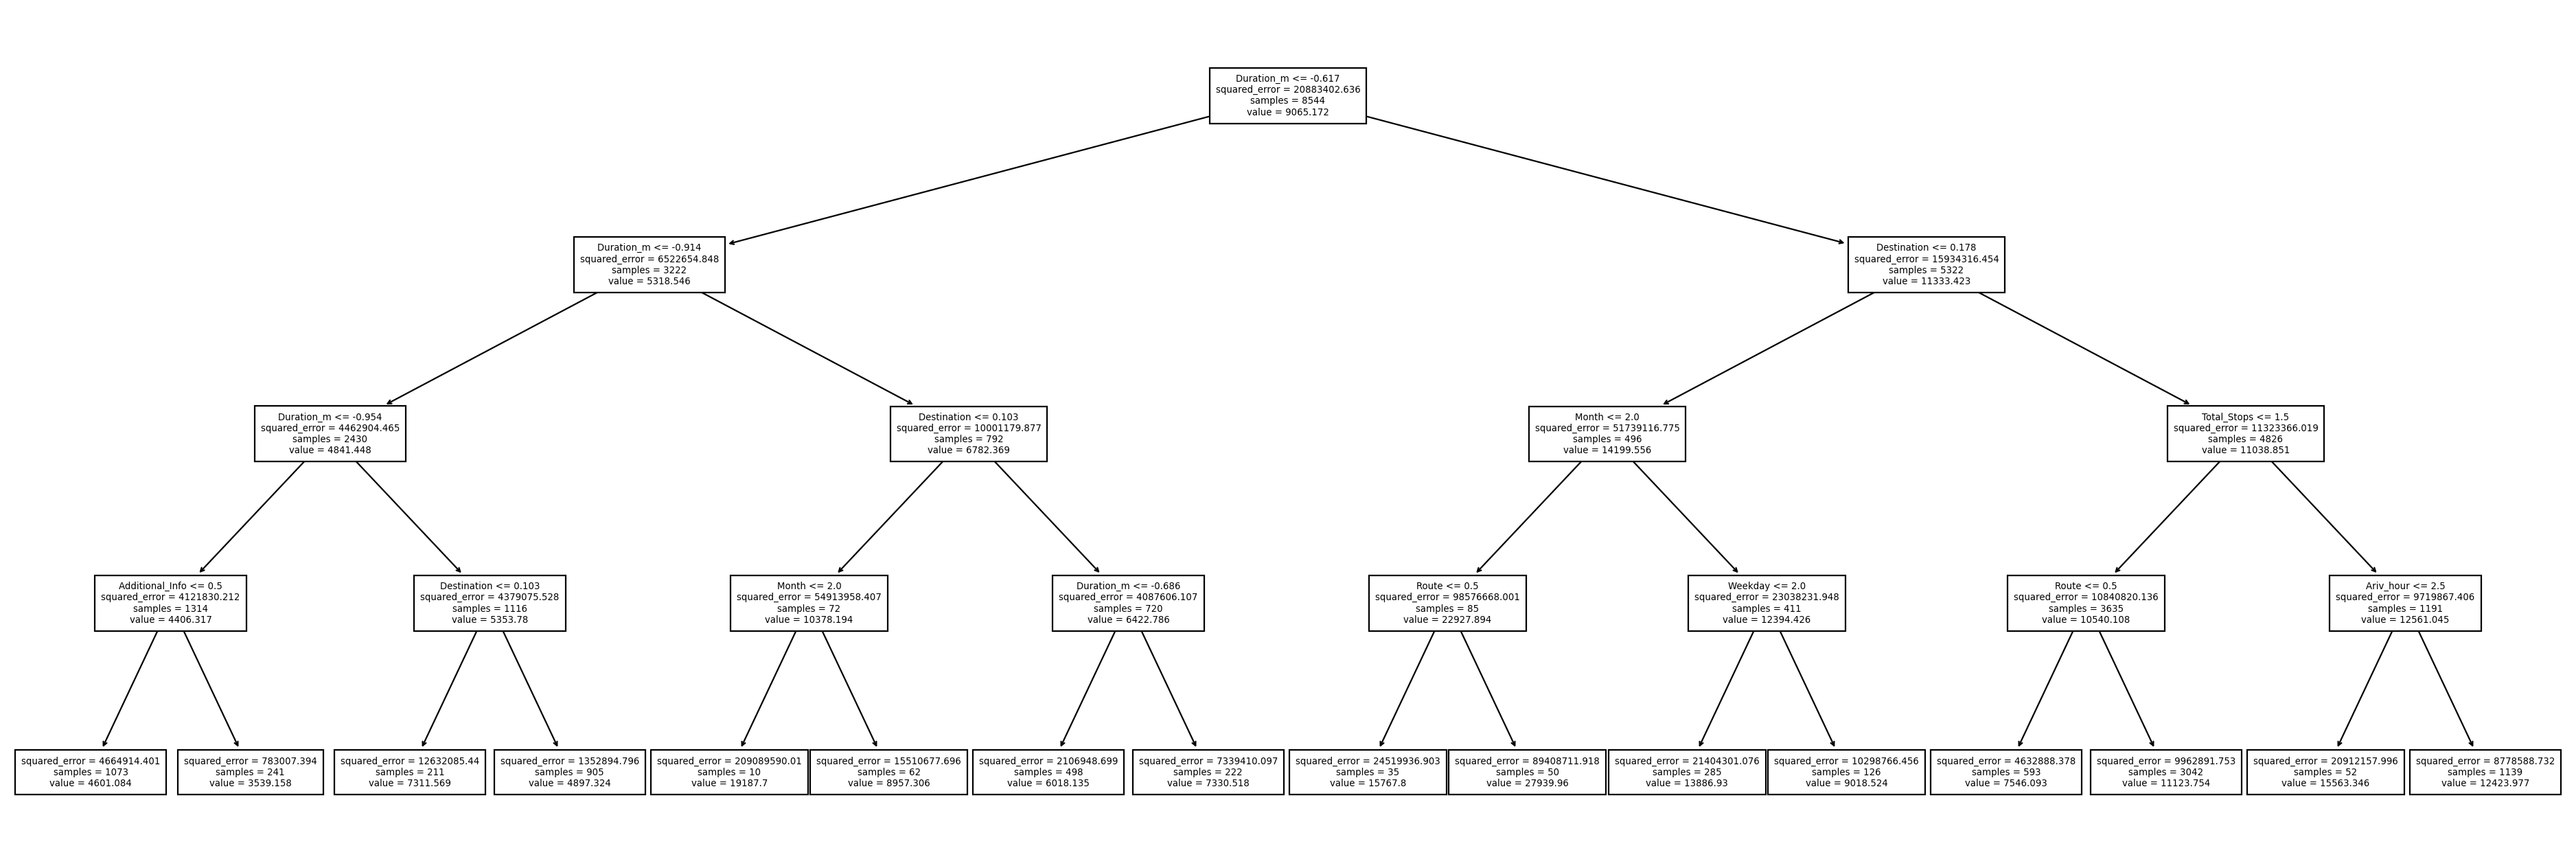

In [149]:
plt.figure(figsize=(30,10),dpi=160)
plot_tree(dt,feature_names=train_x.columns,fontsize=6)
plt.show()

In [150]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [151]:
model(RandomForestRegressor(n_estimators=200,max_depth=5),train_x,train_y,test_x,test_y)

RandomForestRegressor(max_depth=5, n_estimators=200)
R-Square:  0.6524845902564036
Adjusted R2:  0.6510141442349215
MSE:  7908328.104292141
RMSE:  2812.1749775382295
MAPE:  0.22174893900475232



In [152]:
model(GradientBoostingRegressor(n_estimators=200,max_depth=5),train_x,train_y,test_x,test_y)

GradientBoostingRegressor(max_depth=5, n_estimators=200)
R-Square:  0.8132536435961439
Adjusted R2:  0.812463461552122
MSE:  4249743.802188284
RMSE:  2061.49067477597
MAPE:  0.14879164864177494



In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
param_grid = {'n_estimators':[200,300,500,700],
             'max_depth':[5,6,7]}

In [155]:
gscv = GridSearchCV(estimator=GradientBoostingRegressor(),
                   param_grid=param_grid,
                   scoring='r2',
                   cv=3,
                   verbose=3)

In [ ]:
gscv.fit(train_x,train_y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END .....max_depth=5, n_estimators=200;, score=0.750 total time=   1.4s
[CV 2/3] END .....max_depth=5, n_estimators=200;, score=0.788 total time=   1.4s
[CV 3/3] END .....max_depth=5, n_estimators=200;, score=0.757 total time=   1.5s
[CV 1/3] END .....max_depth=5, n_estimators=300;, score=0.759 total time=   2.4s
[CV 2/3] END .....max_depth=5, n_estimators=300;, score=0.794 total time=   2.1s
[CV 3/3] END .....max_depth=5, n_estimators=300;, score=0.769 total time=   2.1s
[CV 1/3] END .....max_depth=5, n_estimators=500;, score=0.762 total time=   3.2s
[CV 2/3] END .....max_depth=5, n_estimators=500;, score=0.800 total time=   3.4s
[CV 3/3] END .....max_depth=5, n_estimators=500;, score=0.775 total time=   3.9s
[CV 1/3] END .....max_depth=5, n_estimators=700;, score=0.760 total time=   4.6s
[CV 2/3] END .....max_depth=5, n_estimators=700;, score=0.800 total time=   4.3s
[CV 3/3] END .....max_depth=5, n_estimators=700;

In [ ]:
gscv.best_score_

In [ ]:
gscv.best_params_

In [ ]:
model(GradientBoostingRegressor(**gscv.best_params_),train_x,train_y,test_x,test_y)